# 자연어 처리

- JDK 설치 및 JAVA_HOME
- conda install konlpy
- cmd nltk
- jpype : java와 python 연결해주는 역할
- pip install JPype1-1.3.0-cp38-cp38-win_amd64.whl --user
- gensim : conda install -c conda-forge gensim
- wordcloud : conda install -c conda-forge wordcloud

In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version: 1.20.1
pandas version: 1.2.4


In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError
import requests
import re

In [19]:
# konlpy와 wordcloud 설치확인
from konlpy.tag import Kkma ,Hannanum ,Twitter
from wordcloud import WordCloud, STOPWORDS

### 모든 엔진에서 공통으로 사용이 가능한 함수 
- nouns() :명사추출
- morphs():형태소 추출
- pos()   :품사

In [4]:
# 꼬꼬마 프로젝트 참고 사이트 : http://kkma.snu.ac.kr/

kkma = Kkma()

In [31]:
kkma.sentences('한국어 문장 분석을 시작합니다. 설치가 어려웠지만 배우는 과정인거요.')

['한국어 문장 분석을 시작합니다.', '설치가 어려웠지만 배우는 과정인 거요.']

In [32]:
kkma.pos(kkma.sentences('한국어 문장 분석을 시작합니다. 설치가 어려웠지만 배우는 과정인거요.')[1])

[('설치', 'NNG'),
 ('가', 'JKS'),
 ('어렵', 'VA'),
 ('었', 'EPT'),
 ('지만', 'ECE'),
 ('배우', 'VV'),
 ('는', 'ETD'),
 ('과정', 'NNG'),
 ('이', 'VCP'),
 ('ㄴ', 'ETD'),
 ('거', 'NNB'),
 ('이', 'VCP'),
 ('요', 'EFN'),
 ('.', 'SF')]

In [34]:
kkma.nouns('한국어 문장 분석을 시작합니다. 설치가 어려웠지만 배우는 과정인거요.')

['한국어', '문장', '분석', '설치', '과정', '거']

In [35]:
han=Hannanum()

In [36]:
han.nouns('한국어 문장 분석을 시작합니다.')

['한국어', '문장', '분석', '시작']

In [37]:
han.pos('한국어 문장 분석을 시작합니다.')

[('한국어', 'N'),
 ('문장', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('.', 'S')]

In [38]:
twi = Twitter()

In [39]:
twi.nouns('한국어 문장분석을 시작합니다.')

['한국어', '문장', '분석', '시작']

### alice.txt를 이용한 워드 클라우드

In [40]:
txt = open('C:/Users/whgud/data/alice.txt').read()
txt

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [41]:
from PIL import Image

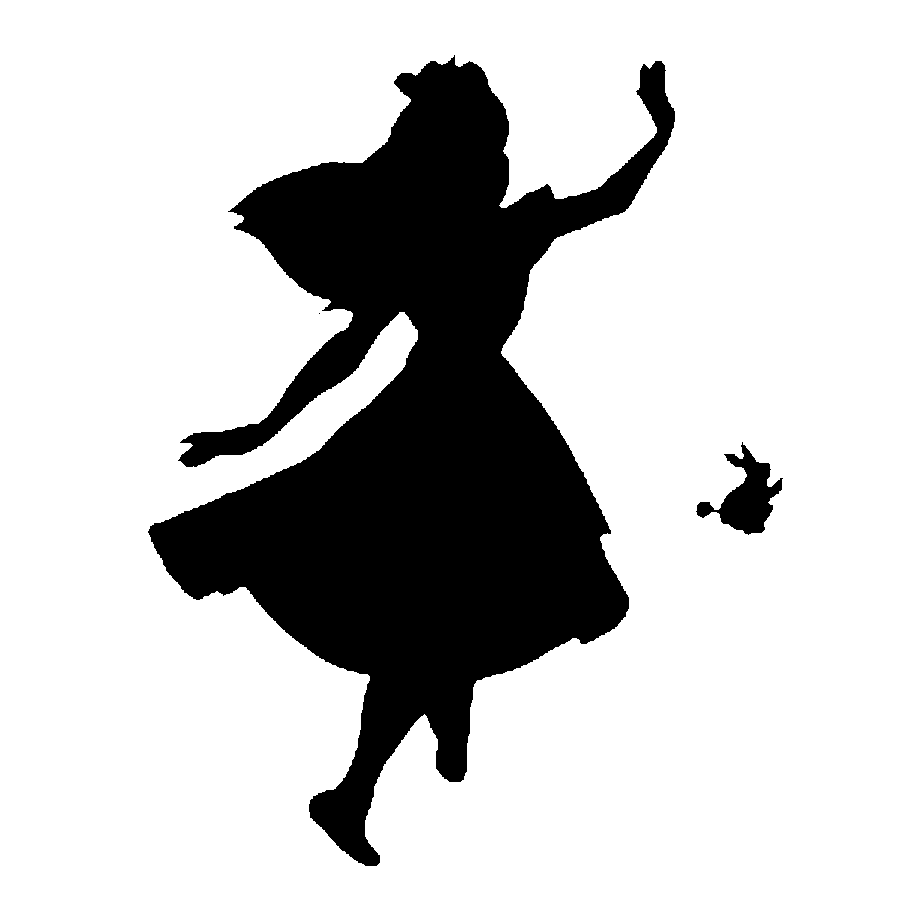

In [42]:
Image.open('C:/Users/whgud/data/alice_mask.png')

In [43]:
masking = np.array(Image.open('C:/Users/whgud/data/alice_mask.png'))
masking

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

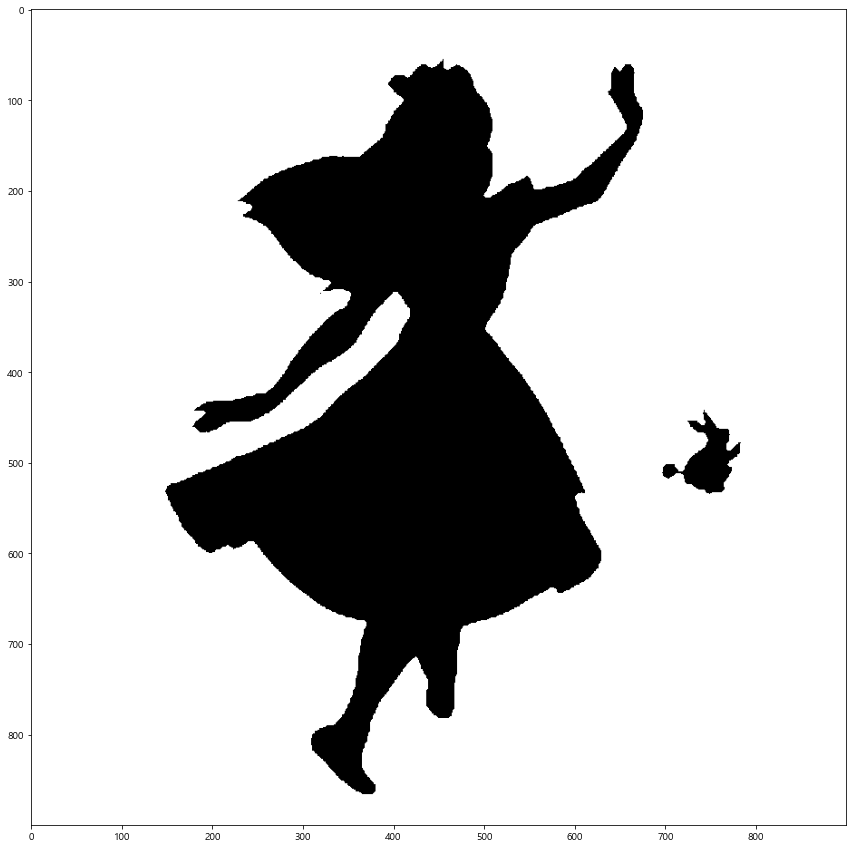

In [47]:
plt.figure(figsize=(15,15))

plt.imshow(masking , cmap = plt.cm.gray)

plt.show()
plt.close()

In [53]:
# 불용어 등록하기

sw = set(STOPWORDS)
sw.add('said')

In [60]:
wc = WordCloud(mask = masking ,
               background_color='white', 
               max_words=2000,     # 단어의 최대 개수 의미
               stopwords = sw      # 불용어 제거한다는 의미
              )
wc = wc.generate(txt)
wc.words_ # 단어들의 빈도 확인

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

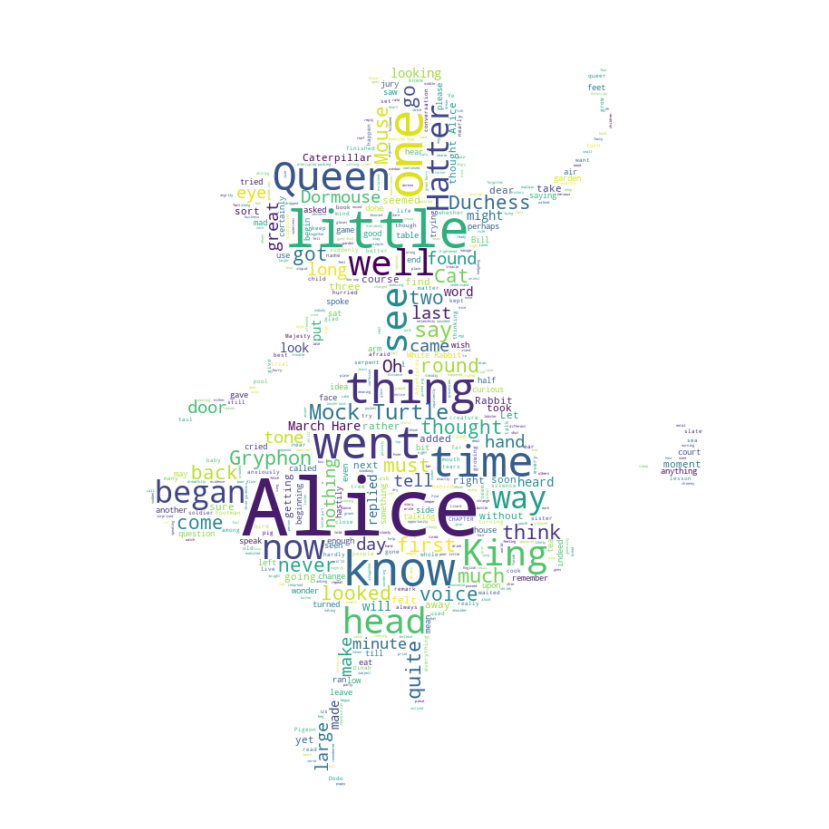

In [64]:
plt.figure(figsize=(15,15))

plt.imshow(wc, interpolation = 'bilinear') # interpolation = 'bilinear' : 단어들이 겹쳐서 보이지 않게 해줌.
plt.axis('off') # 축 안보이게
plt.show()
plt.close()

#### ml_scraping_crawling[02]에서 했던 영화리뷰 크롤링 부분 활용해서 자연어처리 해보기
#### 리뷰를 통한 감성분석(VADER) - NLTK
#### 리뷰 문장 단어 중에서  good : +0.1, awful : -0.1, perfect : +0.2 처럼 해서
#### 양수일 경우엔 긍정, 음수일 경우엔 부정으로 해석해보자

In [71]:
import nltk
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\whgud\AppData\Roaming\nltk_data...


In [70]:
try:
    html=urlopen('https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup=BeautifulSoup(html.read(),'html.parser')
    print(soup)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Avengers: Infinity War (2018) - Avengers: Infinity War (2018) - User Reviews - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/title/tt4154756/reviews" rel="canonical"/>


In [66]:
review_list = soup.find_all('div',{'class':'imdb-user-review'})
review_list

[<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw6692429" data-vote-url="/title/tt4154756/review/rw6692429/vote/interesting">
 <div class="review-container">
 <div class="lister-item-content">
 <div class="ipl-ratings-bar">
 <span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon " fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 <span>10</span><span class="point-scale">/10</span>
 </span>
 </div>
 <a class="title" href="/review/rw6692429/"> Better than Endgame
 </a> <div class="display-name-date">
 <span class="display-name-link"><a href="/user/ur128816687/">grztxks</a></span><span class="review-date">14 March 2021</span>
 </div>
 <div class="content">
 <div class="text show-more__c

In [85]:
data=[]
sum_review='' # 워드클라우드 띄울 때 모든 리뷰텍스트를 합친 문자열
print('nltk sid - ploarity_score() : 단어의 긍정, 부정, 중립에 대한 점수를 계산해주는 함수')
for review in review_list:
    content=review.find('div',{'class':'text show-more__control'}).get_text()
    #print(content)
    sum_review = sum_review + content # 각각의 리뷰가 하나의 문자열이 되게 해줌.
    
    line_list = tokenize.sent_tokenize(content) # 문장별로 나눠줌.
    #print(line_list)
    
    sum=0.0
    for sen in line_list:
        ss = sid.polarity_scores(sen)
        #print(ss)
        sum = sum+ss['compound']
    #print('sum:',sum)
    total_sum = sum/len(line_list)
    print(total_sum)

nltk sid - ploarity_score() : 단어의 긍정, 부정, 중립에 대한 점수를 계산해주는 함수
0.48778
0.2753909090909091
0.3182
0.20052272727272727
0.37815
0.20355000000000004
0.5423
-0.06573333333333331
0.1101
0.14658
0.5597000000000001
-0.16810833333333328
0.17229615384615385
0.6013714285714286
0.6369
0.24625
0.42415714285714284
0.4404
0.19542500000000002
0.3294
0.5894
0.49495
0.0
0.7365
0.2666142857142857


In [86]:
sum_review

'Infinity war is one of the best MCU protects. It has a great story, great acting, and awesome looking. If you aren\'t a Marvel fan or haven\'t watched most of the previous MCU movies this however, won\'t be something for you. Let\'s start with Thanos, definitely one of the best villains, he has a motive, is well played, you can even say that Infinity war tells his story and not the story of a hero. But also most of the other cast members were great in their role and again, if you love Marvel, watch this movie.Avengers: Infinity War is a film that should be utter crap. A franchise stretching almost twenty films is unheard of. And making a great and satisfying climax to that franchise is nearly impossible. Considering how many characters Marvel had to juggle together with this movie, there was almost no way this movie wouldn\'t suck.But it didn\'t. Marvel pulled it off. All of the characters were balanced seemingly effortlessly. The action was amazing. The characters were funny. The sto

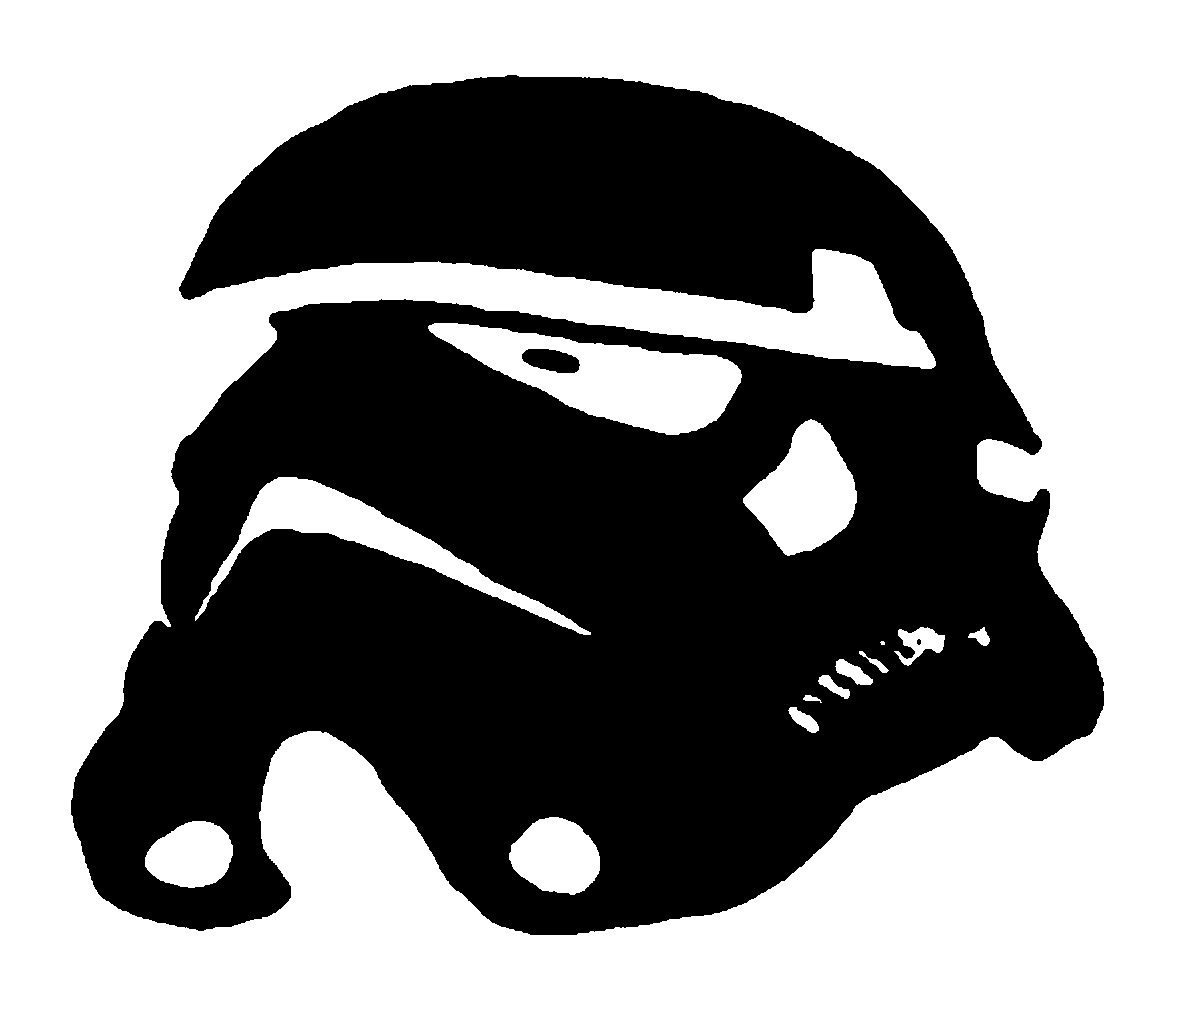

In [87]:
Image.open('C:/Users/whgud/data/stormtrooper_mask.png')

In [88]:
masking1 = np.array(Image.open('C:/Users/whgud/data/stormtrooper_mask.png'))
masking1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [91]:
wc1 = WordCloud(mask = masking1 ,
               background_color='white', 
               max_words=2000     # 단어의 최대 개수 의미

              )
wc1 = wc1.generate(sum_review)
wc1.words_ # 단어들의 빈도 확인

{'movie': 1.0,
 'film': 0.5857142857142857,
 'character': 0.4857142857142857,
 'Infinity War': 0.32857142857142857,
 'Marvel': 0.3142857142857143,
 'Thanos': 0.3142857142857143,
 'best': 0.3,
 'one': 0.21428571428571427,
 'well': 0.21428571428571427,
 'action': 0.2,
 'MCU': 0.18571428571428572,
 'Endgame': 0.18571428571428572,
 'time': 0.18571428571428572,
 'story': 0.17142857142857143,
 'better': 0.17142857142857143,
 'way': 0.15714285714285714,
 'Thor': 0.15714285714285714,
 'universe': 0.15714285714285714,
 'even': 0.14285714285714285,
 'will': 0.14285714285714285,
 'villain': 0.14285714285714285,
 'great': 0.12857142857142856,
 'Avengers': 0.12857142857142856,
 'much': 0.12857142857142856,
 'ending': 0.12857142857142856,
 'see': 0.12857142857142856,
 'perfectly': 0.12857142857142856,
 'make': 0.12857142857142856,
 'every': 0.12857142857142856,
 'Avengers Infinity': 0.12857142857142856,
 'together': 0.11428571428571428,
 'think': 0.11428571428571428,
 'part': 0.11428571428571428,
 '

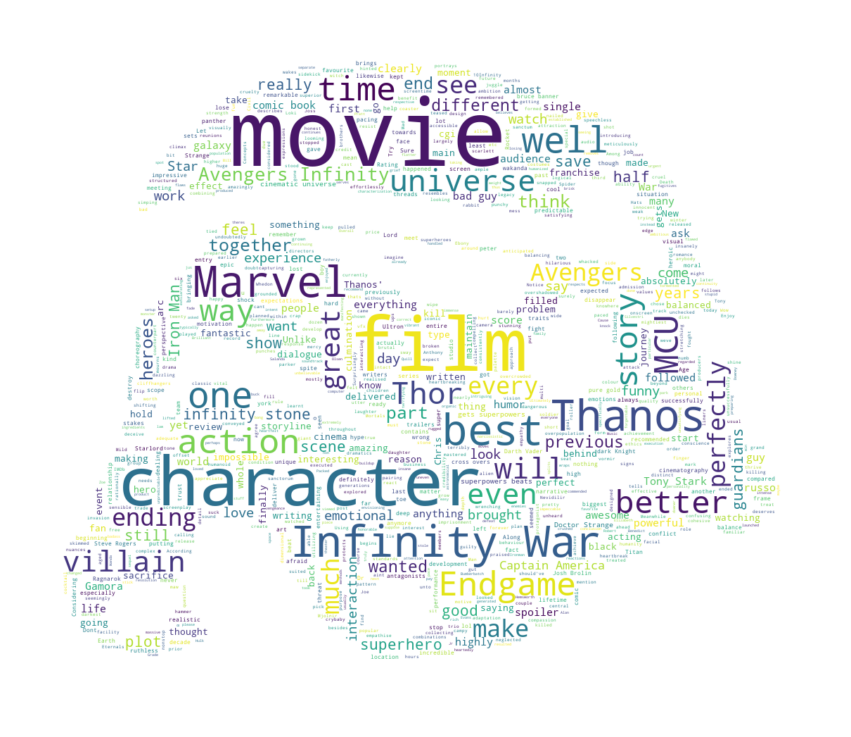

In [92]:
plt.figure(figsize=(15,15))

plt.imshow(wc1, interpolation = 'bilinear') # interpolation = 'bilinear' : 단어들이 겹쳐서 보이지 않게 해줌.
plt.axis('off') # 축 안보이게
plt.show()
plt.close()

## kolaw, kobill 데이터 활용한 실습
- 대한민국 헌법 kolaw
- 대한민국 국회법안 kobill

In [96]:
from konlpy.corpus import kolaw, kobill

kolaw.fileids()

['constitution.txt']

In [97]:
txt = kolaw.open('constitution.txt').read()
txt

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [98]:
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [100]:
txt = kobill.open('1809890.txt').read()
txt

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [103]:
print('kkma',kkma.nouns(txt[:20]))
print()
print('hannanum',han.nouns(txt[:20]))
print()
print('twitter',twi.nouns(txt[:20]))

kkma ['지방', '지방공무원법', '공무원', '법', '일부', '일부개정법률안', '개정', '법률안', '정의']

hannanum ['지방공무원법', '일부개정법률안', '정의화']

twitter ['지방공무원법', '일부', '개정', '법률', '안', '정의화']


In [126]:
wc2 = WordCloud(mask = masking1 ,
               background_color='white', 
               max_words=2000,     # 단어의 최대 개수 의미
               font_path = 'C:/Windows/Fonts/HYCYSM.ttf'     # 한글 깨져나올때 폰트 지정.
              )
wc2 = wc2.generate(txt)
wc2.words_ # 단어들의 빈도 확인

{'의': 1.0,
 '수': 1.0,
 '경우': 1.0,
 '따라': 1.0,
 '추가': 1.0,
 '육아휴직자가': 1.0,
 '대체인력': 1.0,
 '월': 1.0,
 'X': 1.0,
 'N P': 1.0,
 '초등학교': 0.8571428571428571,
 '자녀를': 0.8571428571428571,
 '중': 0.8571428571428571,
 '이': 0.7142857142857143,
 '만6세 이하에서': 0.7142857142857143,
 '육아휴직자가 발생한': 0.7142857142857143,
 '발생한 경우': 0.7142857142857143,
 '및': 0.5714285714285714,
 '하고': 0.5714285714285714,
 '법률': 0.5714285714285714,
 '휴직': 0.5714285714285714,
 '비용이': 0.5714285714285714,
 '것으로': 0.5714285714285714,
 '발생하는': 0.5714285714285714,
 '육아휴직급여': 0.5714285714285714,
 '받는': 0.5714285714285714,
 'P': 0.5714285714285714,
 '위의': 0.5714285714285714,
 '표': 0.5714285714285714,
 '않을': 0.5714285714285714,
 '자녀의 연령을': 0.5714285714285714,
 '만 8세': 0.5714285714285714,
 '생 략': 0.5714285714285714,
 '현행과 같음': 0.5714285714285714,
 '이하에서 만8세': 0.5714285714285714,
 '만8세 이하로': 0.5714285714285714,
 '안': 0.42857142857142855,
 '현재': 0.42857142857142855,
 '육아휴직을': 0.42857142857142855,
 '자녀의': 0.42857142857142855,
 '만': 0.42857

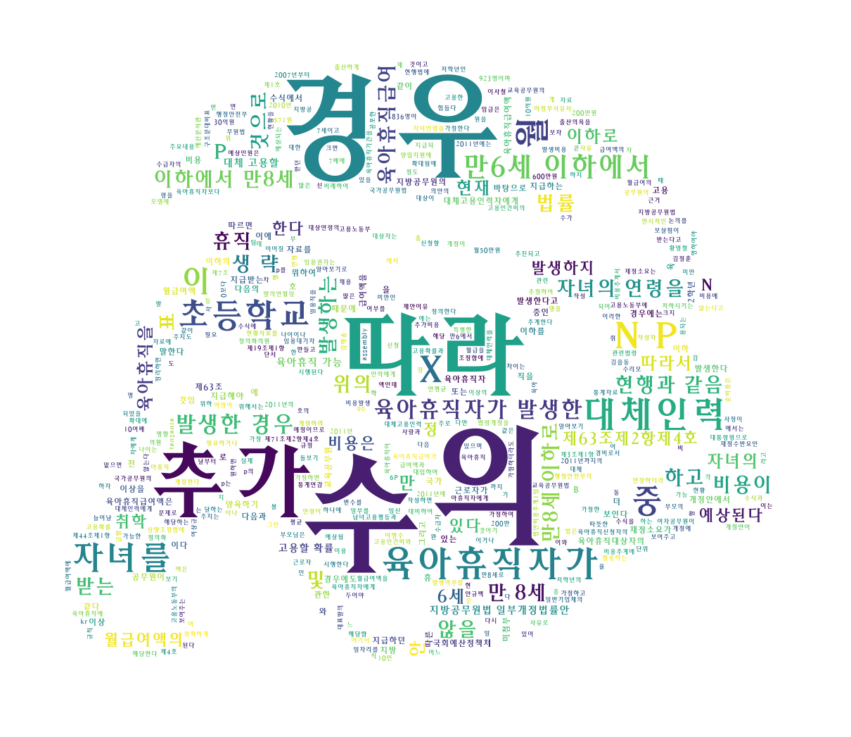

In [127]:
plt.figure(figsize=(15,15))

plt.imshow(wc2, interpolation = 'bilinear') # interpolation = 'bilinear' : 단어들이 겹쳐서 보이지 않게 해줌.
plt.axis('off') # 축 안보이게
plt.show()
plt.close()

In [111]:
t = Twitter()
token_ko = t.nouns(txt)
token_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [114]:
doc = nltk.Text(token_ko)
doc

<Text: 지방공무원법 일부 개정 법률 안 정의화 의원 대표...>

In [115]:
print('개수: ', len(doc.tokens))
print('중복제거: ', len(set(doc.tokens)))

개수:  735
중복제거:  250


In [123]:
kor=doc.vocab()

In [119]:
type(doc.vocab())

nltk.probability.FreqDist

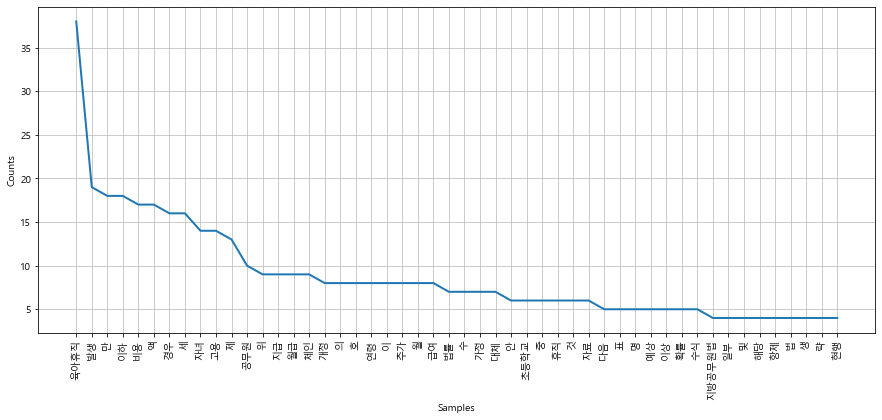

In [130]:
plt.figure(figsize = (15,6))
kor.plot(50)

plt.show()
plt.close()

In [142]:
# 불용어 등록하기

sw2 = nltk.corpus.stopwords.words()
words=['만','액','세','제','위','의','호','이','월','수','안','중','것','및','생','략','P','따라','X','하고']
sw2.extend(words)

In [143]:
# 불용어 제거한 wordcloud 만들기
wc3 = WordCloud(mask = masking ,
               background_color='white', 
               max_words=2000,     # 단어의 최대 개수 의미
               stopwords = sw2 ,
               font_path = 'C:/Windows/Fonts/HYCYSM.ttf'     # 한글 깨져나올때 폰트 지정.
              )
wc3 = wc3.generate(txt)
wc3.words_ # 단어들의 빈도 확인

{'경우': 1.0,
 '추가': 1.0,
 '육아휴직자가': 1.0,
 '대체인력': 1.0,
 '초등학교': 0.8571428571428571,
 '자녀를': 0.8571428571428571,
 '만6세 이하에서': 0.7142857142857143,
 '육아휴직자가 발생한': 0.7142857142857143,
 '발생한 경우': 0.7142857142857143,
 '8세': 0.5714285714285714,
 '법률': 0.5714285714285714,
 '휴직': 0.5714285714285714,
 '가능': 0.5714285714285714,
 '육아휴직': 0.5714285714285714,
 '비용이': 0.5714285714285714,
 '것으로': 0.5714285714285714,
 '발생하는': 0.5714285714285714,
 '육아휴직급여': 0.5714285714285714,
 '받는': 0.5714285714285714,
 '위의': 0.5714285714285714,
 '표': 0.5714285714285714,
 '않을': 0.5714285714285714,
 '자녀의 연령을': 0.5714285714285714,
 '현행과 같음': 0.5714285714285714,
 '이하에서 만8세': 0.5714285714285714,
 '만8세 이하로': 0.5714285714285714,
 '현재': 0.42857142857142855,
 '육아휴직을': 0.42857142857142855,
 '자녀의': 0.42857142857142855,
 '6세': 0.42857142857142855,
 '이하로': 0.42857142857142855,
 '따라서': 0.42857142857142855,
 '제63조제2항제4호': 0.42857142857142855,
 '취학': 0.42857142857142855,
 '한다': 0.42857142857142855,
 '정': 0.42857142857142855,
 '있다': 0.

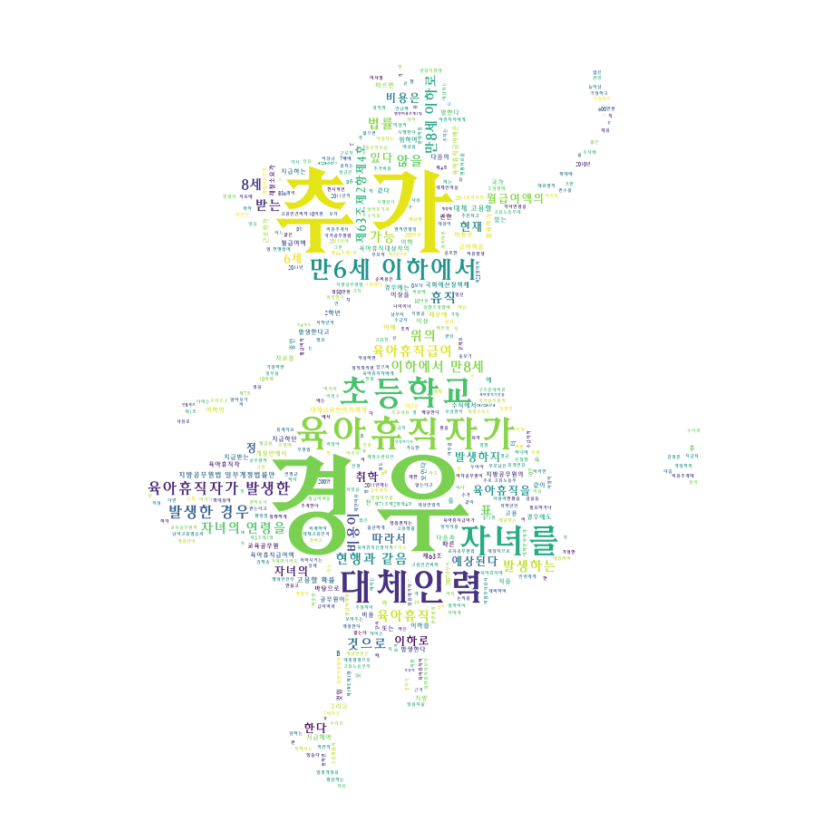

In [144]:
# 불용어 제거된 워드클라우드 시각화
plt.figure(figsize=(15,15))

plt.imshow(wc3, interpolation = 'bilinear') # interpolation = 'bilinear' : 단어들이 겹쳐서 보이지 않게 해줌.
plt.axis('off') # 축 안보이게
plt.show()
plt.close()

In [145]:
stop_word=['만','액','세','제','위','의','호','이','월','수','안','중','것','및','생','략','P','따라','X','하고']

In [146]:
doc = [each_word for each_word in doc if each_word not in stop_word]

In [147]:
doc = nltk.Text(doc)
doc

<Text: 지방공무원법 일부 개정 법률 정의화 의원 대표 발의...>

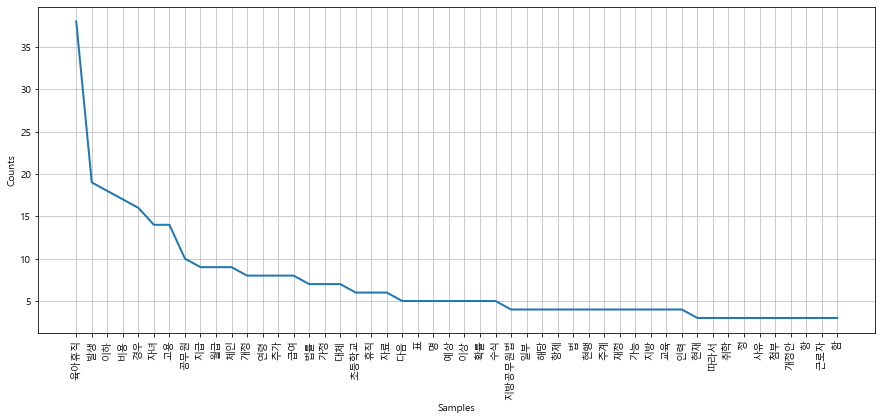

In [148]:
# 불용어 제거하고 시각화
plt.figure(figsize=(15,6))
doc.plot(50)

plt.show()
plt.close()